1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.
 

In [1]:
#carga de las librerias
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y el analisis de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt #creacion de graficos en dos dimenciones 

# libreias implementar modelo de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#lectura de datos en python cargar variable BD
BD = pd.read_csv('heart_cleveland_upload.csv')


In [3]:
#lectura de datos 
BD.head(285)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,44,1,3,112,290,0,2,153,0,0.0,0,1,0,1
281,44,1,3,110,197,0,2,177,0,0.0,0,1,0,1
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
283,43,0,3,132,341,1,2,136,1,3.0,1,0,2,1


In [4]:
#descripcion de los datos
BD.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

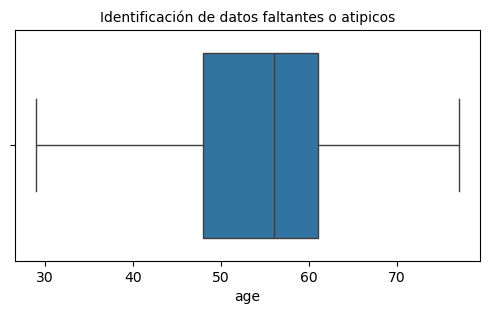

In [5]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['age'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

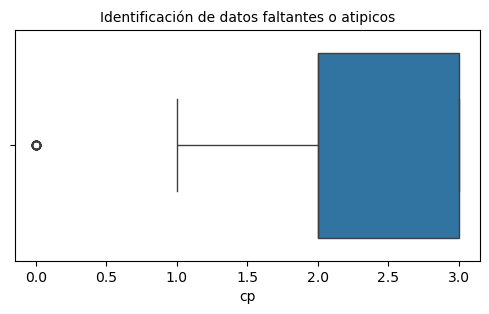

In [6]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['cp'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

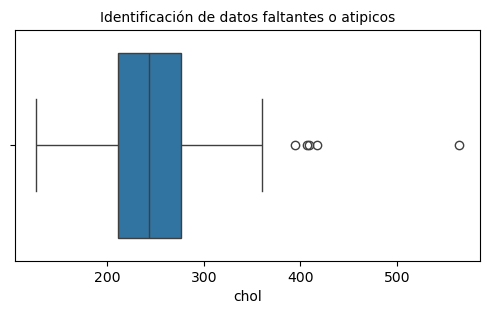

In [7]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['chol'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

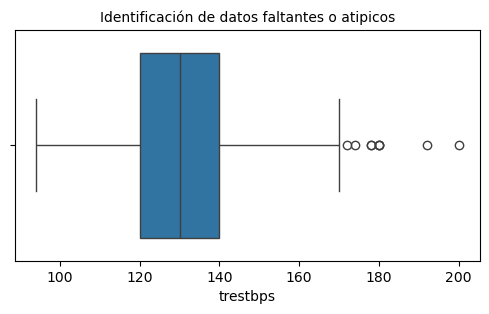

In [8]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['trestbps'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de datos faltantes o atipicos')

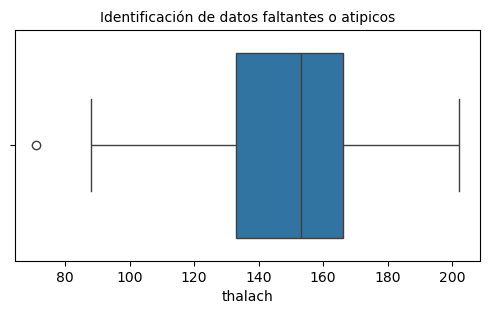

In [9]:
#idintificar datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=BD['thalach'])
plt.title('Identificación de datos faltantes o atipicos',fontsize=10)

In [10]:
print("Cantidad de Registros con cero en age",BD['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps",BD['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol",BD['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach",BD['thalach'].isin([0]).sum())

Cantidad de Registros con cero en age 0
Cantidad de Registros con cero en trestbps 0
Cantidad de Registros con cero en chol 0
Cantidad de Registros con cero en thalach 0


In [11]:
#conteo de datos atipicos
nivel_minimo=1
nivel_maximo=90
Total_Atipicos=((BD['age']<nivel_minimo)|(BD['age']>nivel_maximo)).sum()
print("el total de datos atipicos es{}".format(Total_Atipicos))

el total de datos atipicos es0


In [12]:
#conteo de datos atipicos
nivel_minimo=50
nivel_maximo=220
Total_Atipicos=((BD['trestbps']<nivel_minimo)|(BD['trestbps']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))


el total de datos atipicos es 0


In [13]:
#conteo de datos atipicos
nivel_minimo=57
nivel_maximo=560
Total_Atipicos=((BD['chol']<nivel_minimo)|(BD['chol']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 1


In [14]:
#conteo de datos atipicos
nivel_minimo=40
nivel_maximo=240
Total_Atipicos=((BD['thalach']<nivel_minimo)|(BD['thalach']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 

In [15]:
#filtrar datos atipicos 
BD=BD[(BD['trestbps']<nivel_maximo)&(BD['trestbps']>nivel_minimo)]

In [16]:
#conteo de datos atipicos
nivel_minimo=50
nivel_maximo=220
Total_Atipicos=((BD['trestbps']<nivel_minimo)|(BD['trestbps']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))


el total de datos atipicos es 0


In [17]:
#filtrar datos atipicos 
BD=BD[(BD['chol']<nivel_maximo)&(BD['chol']>nivel_minimo)]

In [18]:
#conteo de datos atipicos
nivel_minimo=57
nivel_maximo=560
Total_Atipicos=((BD['chol']<nivel_minimo)|(BD['chol']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(Total_Atipicos))

el total de datos atipicos es 0


In [19]:
#revicion de tipos de datos 
BD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 4 to 295
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        92 non-null     int64  
 1   sex        92 non-null     int64  
 2   cp         92 non-null     int64  
 3   trestbps   92 non-null     int64  
 4   chol       92 non-null     int64  
 5   fbs        92 non-null     int64  
 6   restecg    92 non-null     int64  
 7   thalach    92 non-null     int64  
 8   exang      92 non-null     int64  
 9   oldpeak    92 non-null     float64
 10  slope      92 non-null     int64  
 11  ca         92 non-null     int64  
 12  thal       92 non-null     int64  
 13  condition  92 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 10.8 KB


3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 

In [20]:
#Determinar si una persona si tiene una enfermedad cardiaca o no.
#total de personas con enfermedad cardiaca 
BD['condition'].value_counts()

condition
0    55
1    37
Name: count, dtype: int64

In [21]:
BD[['condition']].head(40)

,condition
4,0
12,1
14,0
15,0
17,0
20,0
22,0
27,0
29,0
47,0


4. Dividir el dataset en Train y Test para evaluar correctamente

In [22]:
#Dividir el dataset en Train y Test para evaluar correctamente (train)=75%, ypara prueba (test)=25%
#se crean variables x y Y

x=BD.drop('condition',axis=1)#se cargan los datos de train sin los datos de la columna 
y=BD['condition']#se cargan los datos de train con los datos de la columna
# crear divicion de conjuntos de datos 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)
 

5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [23]:
#Construir el modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = 'liblinear') # liblinear es una libreria
modelo_regresion.fit (x_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
# crear modelo de prediccion 
prediccion = modelo_regresion.predict(x_test) # la funcion predict predice los valores

In [25]:
print (y_test)

247    1
210    1
17     0
294    1
271    0
48     0
97     0
72     0
70     0
129    1
243    1
152    0
218    0
95     0
135    0
175    1
27     0
128    1
197    1
145    0
182    1
156    0
4      0
Name: condition, dtype: int64


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [26]:
# desempeño del modelo
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

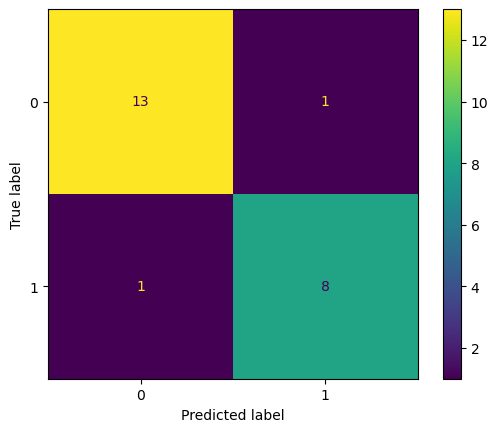

In [27]:
#  matrix de confucion 


cm=confusion_matrix(y_test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

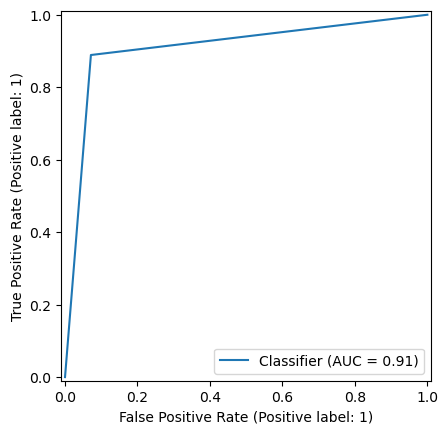

In [28]:
#curva de precision del modelo 
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_predictions(y_test, prediccion)
plt.show()


8. Interpretar, analizar y documentar los resultados obtenidos.

1. las predicciones positivas verdaderas son del 0,89, lo que significa que el 89% de las predichos con enfermedades cardiacas son verdaderos
2. Recall el modelo identifico correctamente el 89% de todos los enfermos cardiacos
3. F1 Score: el equilibrio de precicion y Rcall es del 89%
   Matris de confucion
1. Verdaderos negativos: el recuento de clasificaciones predijo correctamente como falso 13
2. verdaderos positivos: el recuento de clasificaciones predijo correctamente como verdadero 8
3. Falsos positivos:el recuento de clasificaciones predijo incorrectamente como verdadero 1
4. Falsos negativos:el recuento de clasificaciones predijo incorrectamente como falso 1
   curva de precicion
